In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [7]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

Weather frequencies



M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [8]:
#label br/fg if weather code contains FG or BR

station["brfg_l"] = "No BR/FG"
mask = station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]] = "BR/FG"
mask = station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]] = "BR/FG"
pd.options.display.max_rows = 999

print(station.sample(100))
print("*****************************")
station["brfg_l"].value_counts(normalize=True)

                    wxcodes_o    brfg_l
time                                   
2018-12-21 11:00:00        FG     BR/FG
2020-05-10 21:30:00         M  No BR/FG
2019-09-05 15:00:00         M  No BR/FG
2019-10-05 00:30:00         M  No BR/FG
2019-07-04 09:00:00         M  No BR/FG
2018-10-19 22:00:00         M  No BR/FG
2020-08-05 02:00:00         M  No BR/FG
2019-10-19 23:30:00      BCFG     BR/FG
2018-12-11 07:00:00         M  No BR/FG
2019-05-04 16:30:00         M  No BR/FG
2019-12-10 17:00:00         M  No BR/FG
2019-11-26 18:00:00         M  No BR/FG
2019-02-09 18:00:00  -RADZ BR     BR/FG
2018-09-23 15:00:00         M  No BR/FG
2018-12-28 22:00:00         M  No BR/FG
2019-03-08 04:30:00         M  No BR/FG
2020-09-02 21:30:00         M  No BR/FG
2018-09-25 05:30:00         M  No BR/FG
2019-12-27 03:30:00         M  No BR/FG
2020-05-19 11:30:00         M  No BR/FG
2019-10-08 05:03:00      BCFG     BR/FG
2019-04-27 06:00:00         M  No BR/FG
2020-07-08 16:00:00         M  No BR/FG


No BR/FG    0.789954
BR/FG       0.210046
Name: brfg_l, dtype: float64

**Forecast D0**

In [9]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [52]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,brfg_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-07-16 20:00:00,No BR/FG,9.73,0.00,2801.43,6.18,8.20,101434.73,293.61,0.72,24211.19,...,0.00,0.00,0.36,0.00,0.00,0.36,5740.81,1519.61,261.73,288.78
2019-03-05 20:00:00,BR/FG,194.48,0.00,1581.19,10.14,19.67,100205.91,286.13,0.94,3432.53,...,24.31,-63.02,0.60,1.00,1.00,1.00,5450.44,1388.40,254.08,280.10
2020-10-25 08:00:00,BR/FG,224.77,0.00,1813.60,6.57,13.13,101085.92,286.53,0.95,24229.96,...,241.97,-0.52,0.30,0.44,0.00,0.44,5511.68,1444.13,255.77,278.44
2020-03-11 03:00:00,BR/FG,52.60,0.00,2292.62,0.31,0.58,102483.17,281.16,1.00,24047.79,...,0.00,-0.00,0.00,0.05,0.00,0.05,5726.64,1535.83,259.96,283.15
2019-12-05 03:00:00,No BR/FG,23.56,0.00,1734.05,3.57,4.96,101771.13,278.90,0.87,24070.83,...,0.00,0.00,0.00,0.00,0.00,0.00,5559.15,1478.31,252.26,281.36
2020-07-10 07:00:00,No BR/FG,20.05,0.00,3177.47,2.93,3.73,101843.16,290.08,0.78,24051.98,...,0.00,-0.00,0.04,0.00,0.00,0.04,5774.68,1531.17,264.62,290.55
2020-06-24 05:00:00,BR/FG,314.84,0.00,3113.83,1.16,2.34,101484.09,285.96,1.00,24234.92,...,0.00,-0.00,0.00,0.00,0.00,0.00,5734.15,1515.55,260.37,292.02
2019-01-12 08:00:00,No BR/FG,167.78,0.00,938.47,2.06,3.65,103303.13,276.96,0.88,24089.16,...,0.00,-0.00,0.00,0.00,0.00,0.00,5661.32,1569.53,249.58,275.76
2019-05-30 17:00:00,No BR/FG,287.00,0.00,2890.82,5.24,7.10,102339.44,297.93,0.49,24135.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,5802.07,1582.90,260.98,289.49


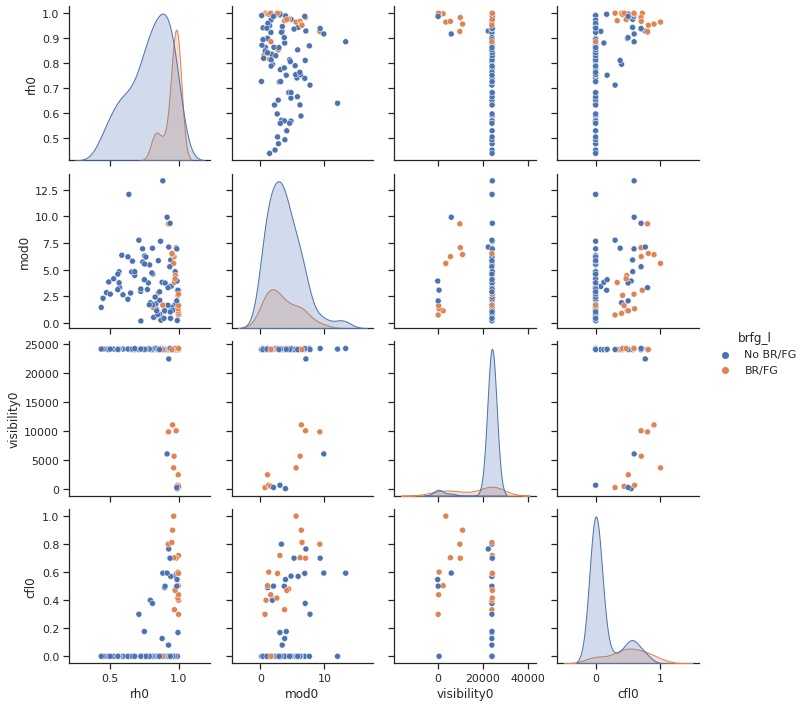

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["brfg_l","rh0","mod0","visibility0","cfl0"]].sample(100), hue="brfg_l");

In [53]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:59<00:00,  2.06s/it]


In [15]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.87,0.79,None,0.87,6.27
LabelSpreading,0.87,0.79,None,0.87,8.62
LGBMClassifier,0.89,0.77,None,0.89,0.85
ExtraTreesClassifier,0.90,0.77,None,0.89,1.52
KNeighborsClassifier,0.87,0.77,None,0.87,0.94
RandomForestClassifier,0.89,0.76,None,0.89,6.08
BaggingClassifier,0.87,0.76,None,0.87,4.38
QuadraticDiscriminantAnalysis,0.78,0.75,None,0.80,0.22
GaussianNB,0.75,0.74,None,0.77,0.08


**Meteorological model independent variables X**

In [54]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**ML LGBMClassifier. Samples 10. Heidke Skill score. Significance level (alpha) = 0.01 for normality test of HSS samples**


Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       423       166   589
No BR/FG    232      2473  2705
All         655      2639  3294
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.65    0.72      0.68   589.00
No BR/FG           0.94    0.91      0.93  2705.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.79    0.82      0.80  3294.00
weighted avg       0.89    0.88      0.88  3294.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       401       167   568
No BR/FG    223      2503  2726
All         624      2670  3294
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.64    0.71      0.67   568.00
No BR/FG           0.94    0.92      0.93  2726.00
accuracy           0.88 

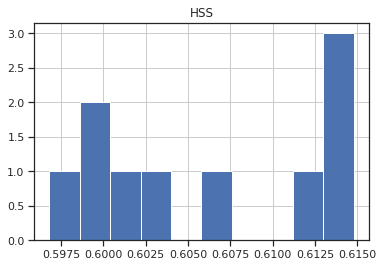

In [55]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [56]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [57]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [32]:
# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:58<00:00,  2.01s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.88,0.81,None,0.88,7.42
LabelSpreading,0.88,0.81,None,0.88,11.21
ExtraTreesClassifier,0.90,0.79,None,0.90,1.45
LGBMClassifier,0.90,0.79,None,0.89,0.96
BaggingClassifier,0.88,0.78,None,0.88,4.67
RandomForestClassifier,0.90,0.78,None,0.89,6.96
KNeighborsClassifier,0.88,0.77,None,0.88,1.20
Perceptron,0.83,0.75,None,0.83,0.19
DecisionTreeClassifier,0.85,0.75,None,0.85,0.81



Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       425       164   589
No BR/FG    190      2515  2705
All         615      2679  3294
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.69    0.72      0.71   589.00
No BR/FG           0.94    0.93      0.93  2705.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.81    0.83      0.82  3294.00
weighted avg       0.89    0.89      0.89  3294.00

Confusion matrix (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       412       156   568
No BR/FG    180      2546  2726
All         592      2702  3294
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.70    0.73      0.71   568.00
No BR/FG           0.94    0.93      0.94  2726.00
accuracy           0.90 

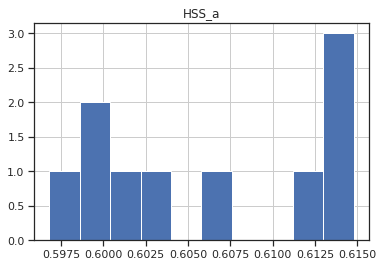

In [66]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_a = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_a.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_a,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_a)
print("\np value:",p)

#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null Hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS_a"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [77]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0     BR/FG  No BR/FG
brfg_l                   
BR/FG       449       158
No BR/FG    194      2493

p-value: 2.0214493126664605e-306
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1400.0771561592057
Reject H0,There is an association between machine learning forecast and observed values


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [62]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_a, alternative="less")

print("\nmeans without time variables:", np.round(HSS,2))
print("\nmeans with time variables:", np.round(HSS_a,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean without time variables = HSS mean with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables ")


means without time variables: [0.61 0.6  0.61 0.6  0.6  0.61 0.6  0.6  0.61 0.61]

means with time variables: [0.64 0.65 0.64 0.67 0.68 0.65 0.63 0.64 0.65 0.65]

alpha:  0.01

p_value point:  8.487173185309977e-06

we are rejecting null hypothesis  H0: HHS mean without time variables = HSS mean with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [63]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("brfg_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [64]:
import sklearn
print(sklearn.__version__)

0.24.1


**Best algorithm too heavy to upload in github!!**

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_b = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_b.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_b[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS_b,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       318       119   437
No BR/FG    138      1896  2034
All         456      2015  2471
Heidke Skill Score: 0.65

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.70    0.73      0.71   437.00
No BR/FG           0.94    0.93      0.94  2034.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.82    0.83      0.82  2471.00
weighted avg       0.90    0.90      0.90  2471.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       356       114   470
No BR/FG    104      1897  2001
All         460      2011  2471
Heidke Skill Score: 0.71

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.77    0.76      0.77   470.00
No BR/FG           0.94    0.95   

,HSS
count,10.00
mean,0.69
std,0.02
min,0.65
25%,0.69
50%,0.70
75%,0.70
max,0.72


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [82]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_a, HSS_b, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_a,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_b,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.64 0.65 0.64 0.67 0.68 0.65 0.63 0.64 0.65 0.65]

HSS ExtraTreesClassifier: [0.65 0.71 0.67 0.68 0.7  0.71 0.7  0.69 0.72 0.7 ]

alpha:  0.01

p_value point:  9.469610433722381e-05

we are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier

we are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier
